In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-v0_8-colorblind')

In [2]:
import json
import awkward as ak
import pathlib
data = ak.from_json(pathlib.Path("outputOldDataBIB.json"))




In [3]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label=""):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    else: data_flat = (data)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    plt.show()

    # a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label=""):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)

    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    plt.show()

In [4]:

def compare1DHistograms(datas,bins,scale='linear',label="",leg=[]):

    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot(111)
    
    for i,data in enumerate(datas): 

        # handle data, there must be a smarter way to do this...
        if type(data[0])==np.int64   : data_flat=data
        elif type(data[0])==np.float32 : data_flat=data
        else : data_flat = ak.flatten(data, axis=None)
        counts, bins, bars = ax.hist(data_flat, bins, alpha=0.5, label=leg[i] if len(leg)>i else "")
        print(counts)
   
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title("1D Comparison between matched and truth muons (BIB)")
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.legend()
    plt.yscale(scale)
    plt.show()

[5. 2. 4. 3. 4. 1. 2. 4. 3. 3. 3. 1. 3. 6. 1. 7. 3. 1. 2. 2. 1. 1. 4. 0.
 3. 3. 4. 5. 4. 4. 5. 2. 4. 1. 5. 3. 4. 2. 2. 1. 2. 7. 3. 1. 9. 3. 4. 1.
 6.]
[5. 1. 4. 3. 4. 1. 2. 3. 3. 3. 2. 1. 3. 5. 1. 5. 3. 1. 1. 2. 0. 1. 2. 0.
 3. 3. 2. 3. 3. 3. 3. 2. 2. 1. 4. 3. 4. 2. 2. 1. 2. 2. 1. 1. 5. 3. 2. 1.
 3.]


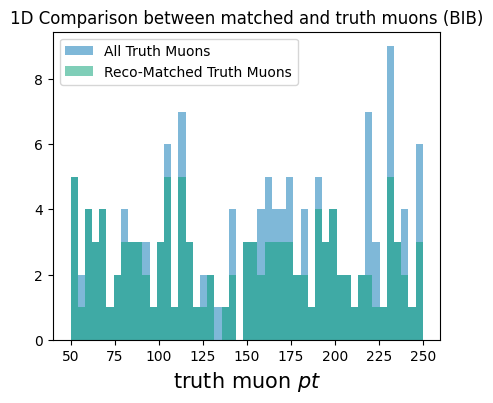

[ 0.  0.  0.  0.  0.  1. 10. 13. 22. 18. 20. 47. 42. 61. 61. 56. 64. 50.
 23. 22. 26. 13.  3.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  9.  8. 19.  9. 15. 32. 32. 55. 45. 41. 47. 30.
 19. 10. 19.  7.  2.  0.  0.  0.  0.  0.  0.]


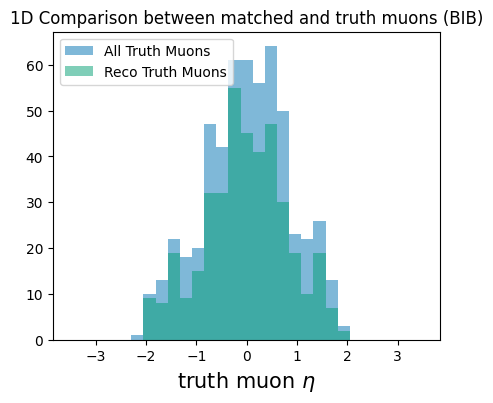

[ 0. 10. 19. 24. 22. 20. 18. 26. 21. 23. 23. 21. 15. 22. 24. 20. 22. 28.
 14. 26. 25. 15. 19. 24. 22. 21. 17. 11.  0.]
[ 0.  7. 14. 16. 18. 16. 15. 16. 16. 15. 19. 11. 10. 17. 18. 15. 15. 22.
 10. 18. 20. 11. 14. 18. 14. 12. 13.  9.  0.]


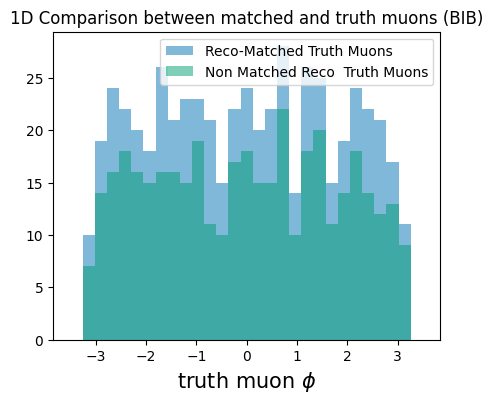

In [5]:
# Steps towards efficiency
import numpy as np

arrays = [data["mcp_pt"],data["mcp_mu_match_pt"]]




legend = [ "All Truth Muons","Reco-Matched Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(50,250,50), leg=legend, label=";truth muon $pt$")

c = data["mcp_eta"]
d = data["mcp_mu_match_eta"]

arrays = [c,d]
legend = [ "All Truth Muons","Reco Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\eta$")

e = data["mcp_phi"]
f = data["mcp_mu_match_phi"]


arrays = [e,f]
legend = [ "Reco-Matched Truth Muons","Non Matched Reco  Truth Muons"]
compare1DHistograms(arrays, bins=np.linspace(-3.5,3.5,30), leg=legend, label=";truth muon $\phi$")


In [14]:
import numpy as np
def plotEff(data1, data2,bins, scale='linear',label=""):
        fig = plt.figure(figsize=(5,4))
        ax = fig.add_subplot(111)
        data = ak.to_list(ak.flatten(data1, axis=None))
        d3 = ak.to_list(ak.flatten(data2, axis=None))
   
        x =  np.histogram(d3, bins)
        y1 = x[0]
        x3 = x[1]
        y1 = y1[:len(y1)]
        print(y1)
   
        x2 = np.histogram(data, bins)
        x1 = x2[1]
        y2 = x2[0]
        x1 = x1[:len(x1)-1]
        print(y2)
        arr = []
        for i in range(len(y2)):
                if y1[i] == 0:
                        y1[i] = 1
                z = float(y2[i])/y1[i]
                if z >= 1:
                        z = 1.0

                arr.append(z)

        

        error = np.sqrt(arr)/np.sqrt(50)
        wid = (max(bins)-min(bins))/len(bins)
        print(wid)

        
        ax.errorbar(x1, arr,error, marker='o',markersize='3', linestyle='')

      
        # handle labels
        title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
        xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
        ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
        
        ax.set_title("Reconstruction Efficency for V1 Muon Collider (BIB)")
        ax.set_xlabel(xlabel, fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        plt.yscale(scale)
        plt.show()

[ 6  2  5  5  2  4  4  3  3  3  6  3  7  2  3  2  1  4  1  4  4  5  6  5
  4  6  1  5  7  2  0  3  7  4  2 10  5  2  6]
[6 1 5 5 2 3 4 3 2 3 6 2 5 2 2 2 0 3 0 4 3 3 4 4 2 4 1 4 7 2 0 3 3 2 1 6 4
 1 3]
5.0


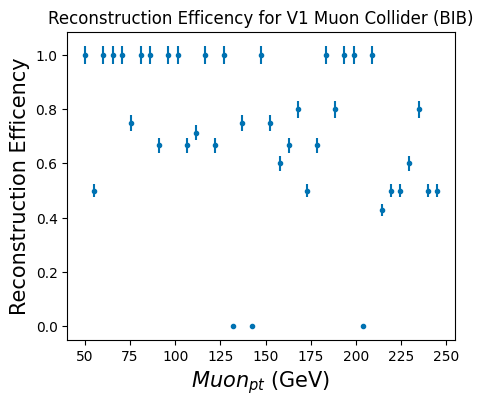

In [15]:
plotEff(data["mcp_mu_match_pt"],data["mcp_pt"],bins=np.linspace(50,250,40),label=";$Muon_{pt} $ (GeV);Reconstruction Efficency")

[10  9 13 18 12 12 12 10 14 12 10 10  9 11 13 10 14 10 11 14 14 14  8 10
 13 15 14 11  6]
[ 9  6  7 14  9 10  6  6 14  5  6  6  9  6 12  6 11  7  9  9 10 11  6  5
  9 13 12  8  4]
0.12666666666666665


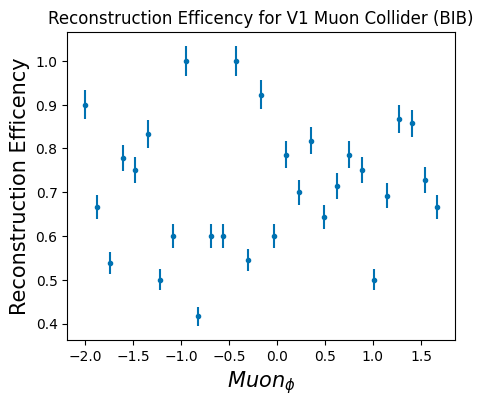

In [16]:
plotEff(data["mcp_mu_match_phi"],data["mcp_phi"],bins=np.linspace(-2,1.8,30),label=";$Muon_{\phi} $;Reconstruction Efficency")

[ 4 10  4 11 13 13 11  7 22 28 24 27 33 36 35 37 28 34 38 33 21 10 14 10
 19 11  7  5  1]
[ 3  9  2  7 12  7  6  6 16 20 16 21 29 30 28 26 22 24 26 23 11 10  9  4
 14  6  5  2  0]
0.13333333333333333


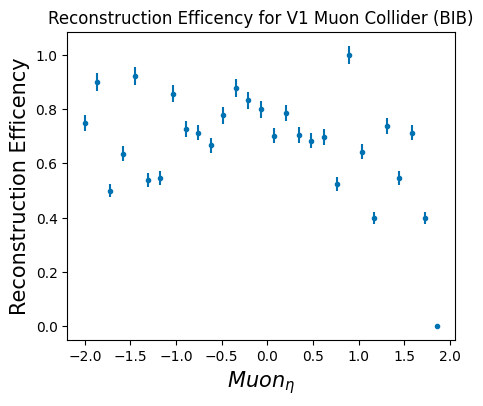

In [17]:
plotEff(data["mcp_mu_match_eta"],data["mcp_eta"],bins=np.linspace(-2,2,30),label=";$Muon_{\eta} $;Reconstruction Efficency")

[ 0 10 19 24 22 20 18 26 21 23 23 21 15 22 24 20 22 28 14 26 25 15 19 24
 22 21 17 11  0]
[ 0  7 14 16 18 16 15 16 16 15 19 11 10 17 18 15 15 22 10 18 20 11 14 18
 14 12 13  9  0]
0.23333333333333334


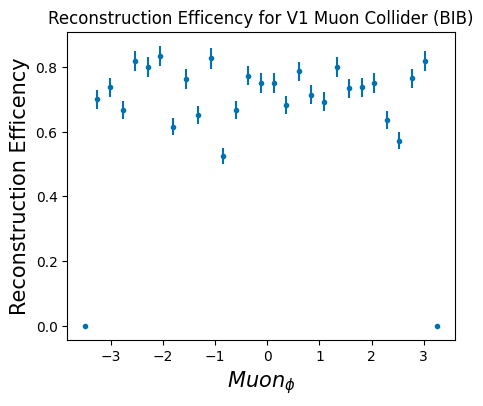

In [18]:
plotEff(data["mcp_mu_match_phi"],data["mcp_phi"],bins=np.linspace(-3.5,3.5,30),label=";$Muon_{\phi} $;Reconstruction Efficency")

<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
<class 'vector.backends.awkward.MomentumArray4D'>
